In [1]:
import openmc
import openmc.deplete
import matplotlib.pyplot as plt

In [12]:
filename = "./depletion_results/endf8_chain_modified/depletion_results.h5"
result = openmc.deplete.Results(filename)

In [13]:
problem_nuclides = ["C14","Ni59","Nb94","I129","H3","Co60"]
actinides = ["U238","U235","Pu239","Pu240","Pu241","Cm242"]
fission_products = ["Sr90","Cs137","Tc99"]
times, activities = result.get_activity(mat="15",by_nuclide=True)
times, total_activity = result.get_activity(mat="15")

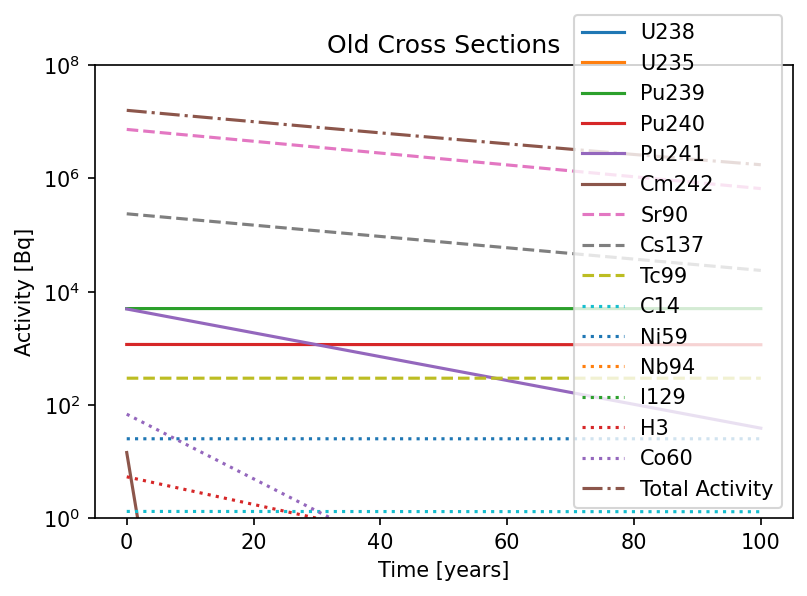

In [14]:
fig, ax = plt.subplots(dpi=150)

for i in actinides:
    values = [ia[i] for ia in activities]
    ax.semilogy(times/60/60/24/365, values, label=i)
for i in fission_products:
    values = [ia[i] for ia in activities]
    ax.semilogy(times/60/60/24/365, values, label=i,ls="--")

for i in problem_nuclides:
    values = [ia[i] for ia in activities]
    ax.semilogy(times/60/60/24/365, values, label=i,ls=":")
ax.semilogy(times/60/60/24/365,total_activity,label="Total Activity",ls="-.")
ax.legend()
ax.set_ylim(1e0,1e8)
plt.xlabel("Time [years]")
plt.ylabel("Activity [Bq]")
plt.title("Old Cross Sections")
plt.savefig("new.png")

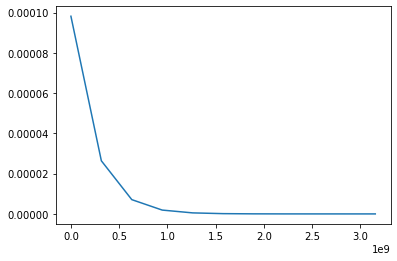

In [39]:
# plot reaction rates for C14

times, rr_c14 = result.get_mass(mat="15",nuc="Co60")
plt.plot(times, rr_c14)